In [ ]:
#1010 금

# Path (경로)

- **경로(Path)**
    - 프로그램에서 사용할 **자원의 위치를 path(경로)**.
    - **파일 시스템**에서는 파일이나 디렉토리가 있는 위치의 경로를 말함.
    

- **절대경로**
    - 자원의 전체 경로를 표현하는 방식
    - 시작 경로부터 자원(파일, 디렉토리)이 있는 위치까지 표현.
        - 시작 경로: Root Path
            - windows: `c:`, `d:`
            - Unix, Linux: `/`

- **상대경로**
    - 현재 작업 경로(위치)에서 부터 자원이 있는 위치까지 표현.
        - 시작 경로: 현재 작업경로
    - 구문
        - `.` : 현재 디렉토리 (보통은 생략)
        - `..`: 상위 디렉토리
        - `/` : 경로 구분자,  상위경로/하위경로

- 운영체제(O/S)별 경로구분자
    - 윈도우즈: `\` (역슬래쉬)
    - 리눅스/유닉스: `/` (슬래쉬)

In [ ]:
# python에 경로 지정 -> str
# 경로구분자로 '\' 사용시 r-string 사용 or '\\' 지정.
# 문자열 안에 \가 있으면 이스케이프 문자로 인식. \n, \t, \r 등
# 경로구분자로 '/' 사용시 그냥 사용 가능.
# 'c:\\temp'
# r"c:\temp:"
# "c:/temp". # windows 에서도 / 를 경로 구분자로 사용 가능.

In [1]:
# 현재 작업 디텍토리 조회 - python script.py -> 실행한 경로
import os  # 운영체제가 제공하는 명령어들을 python 코드로 실행하는 함수들 제공하는 표준 모듈.
wd = os.getcwd(). # os는 많이 사용해요~
print(type(wd), wd)

<class 'str'> /Users/jiyouxg/Desktop/SKN21_mjy/01_python_basic


In [ ]:
# 디렉토리 생성
os.mkdir("new_dir")  # 현재 작업 디렉토리에 new_dir 생성. new_dir = 상대경로 (./ 생략)

In [4]:
os.path.exists("new_dir")  # new_dir이 있는지 여부. 있으면 True, 없으면 False.

True

In [ ]:
if not os.path.exists("new_dir"):  # new_dir이 없으면 만들어라. 
    os.mkdir("new_dir")

In [6]:
# 디렉토리 삭제
os.rmdir("new_dir")  # new_dir이 비어있을 때만 삭제 가능.

In [ ]:
# 디렉토리 삭제 다른 방법
try:
    os.rmdir("new_dir")
except FileNotFoundError:
    print("삭제 할 경로가 없음.")

OSError: [Errno 66] Directory not empty: 'test'

In [7]:
os.mkdir("./a/b/c/d")  # error. 생성 할 디렉토리의 위치(a)가 없으면 에러 발생.

FileNotFoundError: [Errno 2] No such file or directory: './a/b/c/d'

In [17]:
os.makedirs("a/b/c/d", exist_ok=True)  # a,b,c 디렉토리가 없으면 생성 후 d 생성. exist_ok=True : 이미 있으면 에러 안남.

In [18]:
# 절대경로: root path로 시작하는 경로
r"c:\a\b\c"  # windows
"/a/b/c"  # linux, mac

# 상대경로: 현재 경로에서 시작. Root path로 시작하지 않으면 상대 경로.
"./a/b/c"  # 현재 작업 디렉토리의 하위 디렉토리.   ./는 생략 가능.
"../a/b/c"  # 현재 작업 디렉토리의 상위 디렉토리

'../a/b/c'

# 입출력 (IO)

## 입출력이란
- 프로그램이 사용하려는 외부 자원을 연결하여 데이터를 입력 받거나 출력하는 작업을 IO.
- 외부 자원
    - 파일, 원격지 컴퓨터(Network으로 연결된 컴퓨터의 자원), 데이터베이스 등.
- **Stream**
    - 입출력 시 **데이터의 흐름을 stream**.
- InputStream 
    - Program이 외부로 부터 데이터를 읽어 들이는 흐름.
- OutputStream 
    - Program이 외부로 데이터를 써주는 흐름.

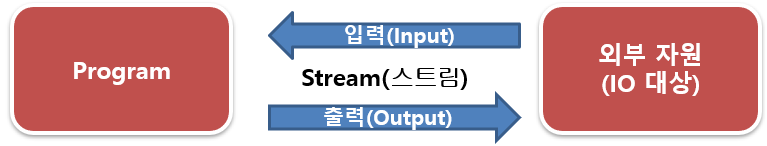

## IO 코딩 순서
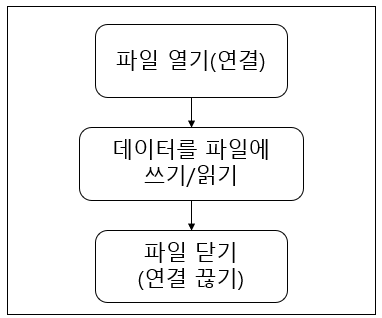

### 파일 열기(연결)
- open() 함수 사용
    - 연결된 파일과 입출력 메소드를 제공하는 객체(Stream)를 리턴
- 구문
    - `open(file, mode='r', encoding=None)`
    - 함수 주요 매개변수
        - file : 연결할 파일 경로
        - encoding 
            - 입출력 대상이 **텍스트 파일일 경우** 인코딩 방식 설정
            - 생략하면  **os 기본 encoding방식을 따른다.**
                - Windows: cp949/euckr
                - Linux, Unix: utf-8
        - mode : 열기 모드
            - mode는 목적, 데이터종류를 조합한 문자열을 사용.

            |mode타입|mode문자|설명|
            |:-|-|-|
            |목적|r|읽기 모드-목적의 기본 모드|
            ||w|새로 쓰기 모드-있으면 지우고 씀|
            ||a|이어 쓰기 모드|
            ||x|새로 쓰기모드-연결하려는 파일이 있으면 Exception발생|
            |데이터종류|b|binary 모드|
            ||t|Text모드-text데이터 입출력시 사용|
    

### 출력 메소드

- write(출력할 Data)
    - 연결된 파일에 `출력할 Data` 출력한다.
- writelines(문자열을 가진 컬렉션)
    - 리스트, 튜플, 집합이 원소로 가진 문자열들을 한번에 출력한다.
    - text 출력일 경우에만 사용가능.
    - 원소에 문자열 이외의 타입의 값이 있을 경우 TypeError 발생

### 입력 메소드
- read() : 문자열(text mode), bytes(binary mode) 
    - 연결된 파일의 내용을 한번에 모두 읽어 들인다.
- readline() : 문자열(text mode), bytes(binary mode)
    - 한 줄만 읽는다.
    - text 입력일 경우만 사용가능
    - 읽은 라인이 없으면 **빈문자열**을 리턴한다.
- readlines() : 리스트
    - 한번에 다 읽은 뒤 각각의 라인을 리스트에 원소로 담아 반환한다.
- Text Input Stream (TextIOWrapper, BufferedReader)은 Iterable 타입.
    - for문을 이용한 라인단위 순차 조회할 수 있다.

In [26]:
import os
# 0. 파일을 저장할 디렉토리 생성
os.makedirs("text", exist_ok=True)

# 1. 연결. open(파일경로(상대/절대), mode="I or O/Data의 종류-t or b")  # mode: I-r, O-w,a,x 
fw = open("text/a.txt", mode="wt", encoding="utf-8")  #encoding: "utf-8", "cp949" ("euckr") 

# print("fw타입:", type(fw)) 

# 2. 쓰기(w), 읽기(r)
fw.write("안녕하세요.\n")  # write(str: t모드, bytes: b모드)
fw.write("반갑습니다.")

str_list = ["\n\n\n", "aaaaaa", "bbbbbb", "cccccc"]
fw.writelines(str_list)  # 리스트, 튜플 등 iterable한 객체를 인수로 받음. 요소들을 순서대로 파일에 기록.

# 3. 연결 닫기 (끊기)
fw.close()

In [ ]:
# Input

# 1. 연결 (Input은 읽을 파일이 있어야 함)
fr = open("text/a.txt", "rt", encoding="utf-8")
print("fr타입:", type(fr))

# 2. 읽기 (input: r모드)
## UnicodeDecodeError 발생 -> encoding 방식이 틀려서 에러. utf-8 <-> cp949
txt = fr.read()  # text 모드- read(): str. 문자열로 리턴. 파일 전체를 문자열로 읽음.

# 3. 연결 끊기
fr.close()

fr타입: <class '_io.TextIOWrapper'>


In [28]:
print(txt)

안녕하세요.
반갑습니다.


aaaaaabbbbbbcccccc


In [ ]:
fr = open("text/a.txt", mode="rt", encoding="utf-8")
txt_list= fr.readlines()  # 라인 단위로 읽기. 
print(txt_list)
fr.close()
# text 모드- readlines(): list. 파일 전체를 줄 단위로 읽어서 각 줄을 요소로 하는 리스트로 리턴.


['안녕하세요.\n', '반갑습니다.\n', '\n', '\n', 'aaaaaabbbbbbcccccc']


In [36]:
fr = open("text/a.txt", mode="rt", encoding="utf-8")
print(fr.readline())  # 한 줄 읽기.
print(fr.readline())  # 한 줄 읽기. 
print(fr.readline())  # 한 줄 읽기. 
print(fr.readline())  # 한 줄 읽기. 
print(fr.readline())  # 한 줄 읽기. 
print(fr.readline())  # 더 이상 읽을 줄이 없으면 빈 문자열 반환.
fr.close()

안녕하세요.

반갑습니다.





aaaaaabbbbbbcccccc



In [ ]:
# rt 모드의 TextIOWrapper는 iterable타입. (for in 문에서 사용 가능 -> 한 줄씩 반환)
fr = open("text/a.txt", mode="rt", encoding="utf-8")

for linenum, s in enumerate(fr, start=1):  # (인덱스, 값) 튜플 반환.
    print(f"{linenum}. {s}")
    print("-------------")
    
fr.close()


1. s
-------------
2. s
-------------
3. s
-------------
4. s
-------------
5. s
-------------


## with block

파일과 입출력 작업이 다 끝나면 반드시 연결을 닫아야 한다. 매번 연결을 닫는 작업을 하는 것이 번거롭고 실수로 안 닫을 경우 문제가 생길 수 있다. **with block은 block을 벗어나면 자동으로 연결을 닫아 준다.** 그래서 연결을 닫는 코드를 생략 가능.

- 구문
```python
with open() as 변수: # `변수`는 open()이 반환하는 Stream객체를 참조.
    입출력 작업      # 변수를 이용해 입출력 작업을 처리.
# with block을 빠져 나오면 close()가 자동으로 실행.
```

In [49]:
with open("text/a.txt", mode="rt", encoding="utf-8") as fr: 
    for linenum, s in enumerate(fr, start=1):  # (인덱스, 값) 튜플 반환.
        print(f"{linenum}. {s}")
        print("-------------")
    print(fr.closed)  # 연결이 끊어졌는지 여부 확인. True

print(fr.closed)

1. 안녕하세요.

-------------
2. 반갑습니다.

-------------
3. 

-------------
4. 

-------------
5. aaaaaabbbbbbcccccc
-------------
False
True


In [ ]:
def open():
    return MyContextManager()

with open() 

In [ ]:
class MyContextManager:

    def __init__(self):
        print("init")

    def __enter__(self):
        # 구문 실행 전에 호출 (전처리 작업)
        print("enter")
    
    def __exit__(self, exception_type, exception_value, exception_traceback): 
        # with 구문 종료 후에 호출 (후처리 작업)
        # exception_type: 예외 클래스
        # exception_value: 예외 객체
        # exception_traceback: traceback 객체
        print("exit")

with MyContextManager():
    print("------- with block -------")

init
enter
------- with block -------
exit


In [ ]:
with open("text/b.txt", mode="wt", encoding="utf-8") as fw:
    fw.write("a\n")
    fw.write("b\n")
    fw.write("가\n")
    fw.write("나\n")

In [ ]:
20  # int
20.6  # float
True  # bool
"hello"  # str
[1, 2, 3]  # list
(1, 2, 3)  # tuple
{1, 2, 3}  # set
{"a":1, "b":2, "c":3}  # dict  

# Binary Data 입출력

## `bytes` type
binary 데이터를 입출력하기 위한 타입.  
파이썬의 하나의 출력함수로 다양한 데이터타입의 값을 출력하기 위해 **bytes 타입으로 변환** 해야 한다. 
또 binary 데이터를 읽을 경우 **bytes 타입**으로 반환. 이것을 저장 전 원래 타입으로 쓰기 위해서는 bytes에서 원래 타입으로 변환하는 작업이 필요. 

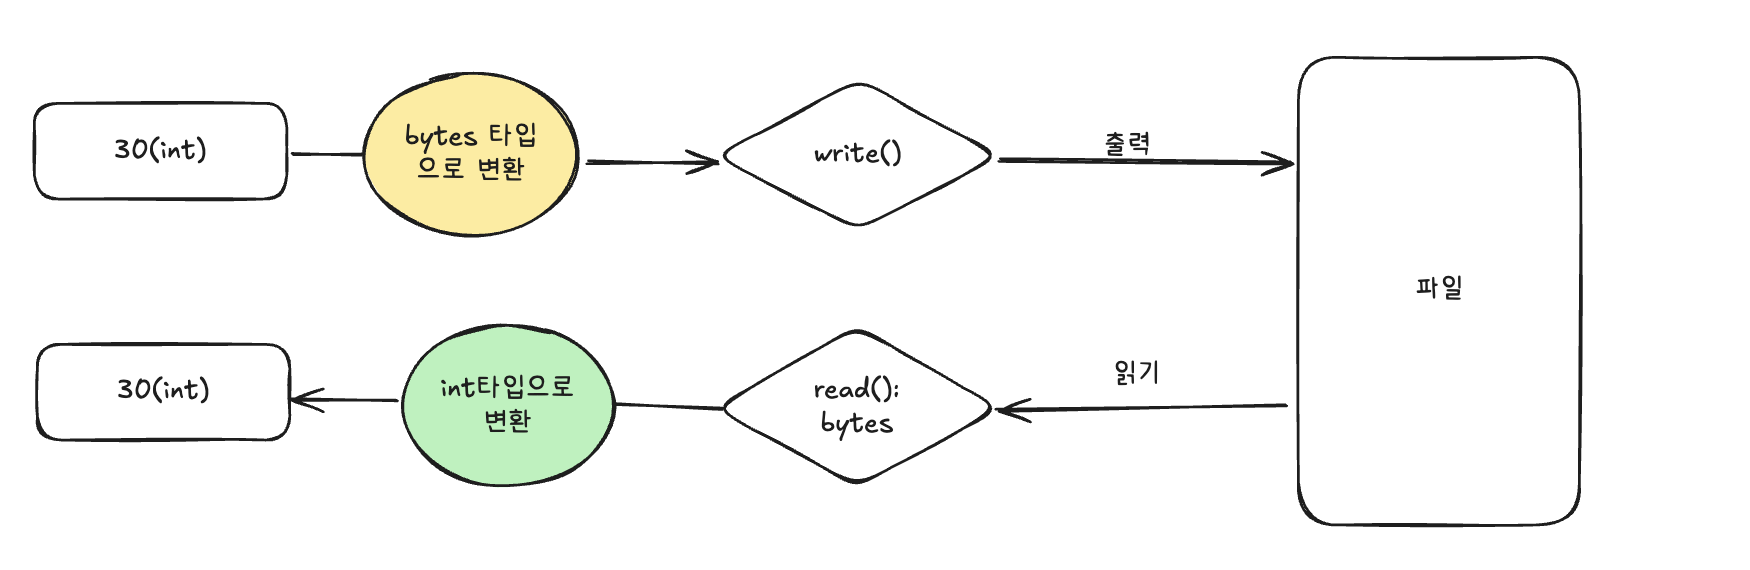

## pickle 모듈을 이용한 객체 직렬화
- pickle 모듈: binary data 입출력을 도와주는 표준 라이브러리.

### 객체 직렬화(Object Serialization)
- 객체의 속성값들을 bytes로 변환해 출력하는 것을 객체 직렬화(Object Serialization).
- bytes로 출력된 데이터를 읽어 객체화 하는 것을 객체 역직렬화(Object Deserialization).

### pickle 모듈
- binary 모드로 출력하거나 입력받을 경우 **bytes**  타입으로 입출력을 진행.
    - 그런데 각각의 타입이 변환하는 방식이 다르기때문에 입출력 코드가 복잡해 지는 문제가 있다. 이것을 추상화해서 binary 데이터 입출력을 쉽게 처리할 수 있게하는 표준모듈이 pickle이다.
    - 파이썬의 모든 값은 객체 이므로 pickle은 객체 직렬화, 역직렬화를 위한 파이썬 표준모듈이다.

- 저장시 파일 확장자는 보통 `pkl` 이나 `pickle`.
- ex)
```python
#### binary mode로 설정한다.
fw = open("data.pkl", "wb") # 객체를 pickle에 저장하기 위한 output stream 생성
fr = open("data.pkl", "rb") # 파일에 저장된 객체를 읽어오기 위한 input stream 생성
```
- **메소드**
    - dump(저장할 객체, fw) : 출력
    - load(fr): 입력 - 읽은 객체를 반환.

In [55]:
import pickle  # binary data 입출력을 도와주는 표준 라이브러리.

i = 1_000_000
# binary를 파일에 출력 - mode: rb(읽을거면 rb, 쓸거면 wb)
with open("text/int_data.pickle", mode="wb") as fo:  # binary 모드로 설정한다.
    # print(type(fo))
    # fo.write(i). # int - 변환 -> bytes
    pickle.dump(i, fo)  # int -> bytes -> file. # i를 bytes로 변환 -> fo.write()를 이용해서 출력.

In [ ]:
with open("text/int_data.pickle", "rb") as fi:
    #print(type(fi))
    #b = fi.read()  # bytes
    #print(type(b))  
    load_i = pickle.load(fi)  # fi에서 bytes들을 read -> 원래 타입 (int)로 변환.

print(type(load_i), load_i)

<class '_io.BufferedReader'>


In [57]:
person_info = {
    "name": "홍길동",
    "age": 30,
    "address": "서울시",
    "blood type": "A"
}
with open("text/person_pickle", "wb") as fo:
    pickle.dump(person_info, fo)  # dict -> bytes -> file

In [58]:
with open("text/person_pickle", "rb") as fi: # binary 모드로 읽으니 rb
    new_person_info = pickle.load(fi) 

print(type(new_person_info))
new_person_info

<class 'dict'>


{'name': '홍길동', 'age': 30, 'address': '서울시', 'blood type': 'A'}

# TODO

- ## 간단한 CLI 기반 메모장
    1. 사용자로부터 파일명을 입력받는다.
    2. 사용자로부터 파일에 저장할 문장을 입력받아서 파일에 저장한다.
        - 한줄씩 입력받는다.
        - 사용자가 !q 를 입력하면 저장후 종료한다.
    3. 사용자가 저장한 파일을 읽어서 출력한다.
